# Import Data Prep

In [1]:
import pandas as pd

raw_data = pd.read_csv('new_and_existing_brews_by_year.csv')

list_of_columns_new = []
for i in range(len(list(raw_data.columns))):
    if i%2==0:
        list_of_columns_new.append(list(raw_data.columns)[i])

def new_brew(x):
    if x > 0:
        return 1
    else:
        return 0

i=0
for col in list_of_columns_new:
    raw_data[str(i)] = raw_data[col].map(lambda x: new_brew(x))
    i+=1
raw_data.set_index('GEOID', inplace=True)

new_brews_X = raw_data[['0','1','2','3','4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17']]
new_brews_y = raw_data[['18']]
demog_data = pd.read_csv('../data_2017.csv')
demog_data.rename({'esriid':'GEOID'}, axis=1,inplace=True)
demog_data.set_index('GEOID', inplace=True)
demog_1 = pd.merge(new_brews_X, demog_data, how='left', on='GEOID')
demog_1 = pd.merge(new_brews_y, demog_1, how='left', on='GEOID')

In [2]:
for col in demog_1.columns:
    print(col)

18
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
pctFBEnteredGE2000
HHInc10
Units2
Over15_moe
MedianEarningsFemale_moe
NativeEnteredGE2000
FamHHInc10
AvgHValue_moe
pctHHInc15
AvgCommute
pctNonFamHHpop
pctGrandPrntsCaring5orMore
pctNonCitizen
Age35_44_moe
AvgHHRetInc_moe
DiffCounty
Built1980_1989
BirthRate15_19_moe
pctOver65Females
HUsMortOver30Pct
UnmarriedPartner
OneRace_moe
pctAssociates
FamHHpop_moe
Women15to19
Vehicles2_moe
ConsOccs
DiffCntySameState
pctBornOutsideUSNative
DiffHouse
NonRelative_moe
DiffCntySameState_moe
FBMinusSea_moe
BirthRate35_50_moe
pctFBEnteredLT2000
pctVehicles2
FBEurope_moe
SingleMothers
pctUnits1Detached
Age65_74_moe
Over18Females_moe
NativeEnteredLT2000
Over16Females_moe
Over5
pctOwnerOcc
Age75_84
WholesaleTrade
MedianEarnings
RetailTrade_moe
pctEduc_Health_SocSvcs
pctSpouse
pctHval500
White2_moe
Professional
pctVehiclesGE3
MobileHomes_moe
MarriedCouples_moe
pctNoPlumbing
VacantForSale
pctTransportation
pctNonRelative
PovUniverse18_64
Built1940_1949
Over85
P

In [3]:
tot_brews_X = demog_1.drop('18', axis=1)
tot_brews_y = demog_1['18']

In [4]:
tot_brews_X.drop(['County','Stab','Over5','pctOthLang','pctSpanish','pctOver5',
              'pctEnglishOnly','AvgHHSize_moe','Over5_moe'], axis=1, inplace=True)

In [5]:
tot_brews_X.fillna(demog_1.median(), inplace=True)
tot_brews_X = tot_brews_X.join(pd.get_dummies(demog_1['Stab']), on='GEOID', how='left')
list_of_moes = []
for col in tot_brews_X.columns:
    if col[-3:]=='moe':
        print(col)
        list_of_moes.append(col)
    else:
        pass
print(len(list_of_moes))
tot_brews_X.drop(list_of_moes, axis=1, inplace=True)

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1076: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


Over15_moe
MedianEarningsFemale_moe
AvgHValue_moe
Age35_44_moe
AvgHHRetInc_moe
BirthRate15_19_moe
OneRace_moe
FamHHpop_moe
Vehicles2_moe
NonRelative_moe
DiffCntySameState_moe
FBMinusSea_moe
BirthRate35_50_moe
FBEurope_moe
Age65_74_moe
Over18Females_moe
Over16Females_moe
RetailTrade_moe
White2_moe
MobileHomes_moe
MarriedCouples_moe
BornInUS_moe
Age75_84_moe
Other1_moe
DiffHouse_moe
Over3_moe
NonCitizen_moe
Built1990_1999_moe
HHFSolar_moe
BirthRate20_34_moe
Age15_19_moe
FamHHInc75_moe
TransOccs_moe
OccHUs_moe
OwnerOcc_moe
BoatRV_moe
Over85_moe
HHsWithKids_moe
TotHUs_moe
FullTimeWorkersFemale_moe
FarmFishOccs_moe
Units1Attached_moe
Civilian_moe
MedianAge_moe
Carpool_moe
USNative_moe
FamHHInc25_moe
Males_moe
FamHHInc100_moe
PCI_moe
PovRatioUnderHalf_moe
UnmarriedPartner_moe
HHFKerosene_moe
VehiclesGE3_moe
Householder_moe
Divorced_moe
PovUniverseUnder18_moe
Women20to34_moe
HHFWood_moe
FamHHInc0_moe
AvgFamSize_moe
HHFNoFuel_moe
PublicTrans_moe
OtherCommute_moe
NumHHEarnings_moe
NoVehicles_mo

In [6]:
tot_brews_X.head()

,0,1,2,3,4,5,6,7,8,9,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
GEOID,,,,,,,,,,,,,,,,,,,,,
15003,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
45013,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
33015,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26081,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
25017,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


# PCA/filtering

In [7]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

x = StandardScaler().fit_transform(tot_brews_X)

pca = PCA(n_components=2)

principalComponents = pca.fit_transform(x)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
x = principalDf['principal component 1']
y = principalDf['principal component 2']
z = tot_brews_X['TotPop']

scaled_z = (z - z.min())*2 / z.ptp()
colors = plt.cm.coolwarm(scaled_z)

plt.scatter(x, y, marker='.', edgecolors=colors, s=20, linewidths=4)
plt.title('Principal Components by Population\nAll Counties')
plt.xlabel('PC 1 (40.06% of variance)')
plt.ylabel('PC 2 (7.86% of variance)')
plt.show()

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/ipykernel_launcher.py:17: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.


<Figure size 640x480 with 1 Axes>

In [8]:
pca.explained_variance_ratio_

array([0.40060154, 0.07858921])

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/ipykernel_launcher.py:21: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.


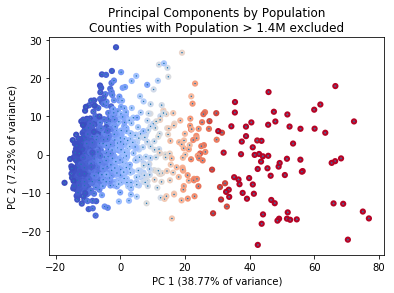

In [9]:
list_of_high_pop_counties = tot_brews_X[tot_brews_X['TotPop']>1400000]

tot_brews_X_out_rem = tot_brews_X.drop(list_of_high_pop_counties.index, axis=0)

# print(tot_brews_X.shape)
# print(tot_brews_X_out_rem.shape)
# print(len(list_of_high_pop_counties.index))

x = StandardScaler().fit_transform(tot_brews_X_out_rem)

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

x = principalDf['principal component 1']
y = principalDf['principal component 2']
z = tot_brews_X_out_rem['TotPop']

scaled_z = (z - z.min())*2 / z.ptp()
colors = plt.cm.coolwarm(scaled_z)

plt.scatter(x, y, marker='.', edgecolors=colors, s=20, linewidths=4)
plt.title('Principal Components by Population\nCounties with Population > 1.4M excluded')
plt.xlabel('PC 1 (38.77% of variance)')
plt.ylabel('PC 2 (7.23% of variance)')
plt.show()

In [10]:
pca.explained_variance_ratio_

array([0.38774431, 0.07232005])

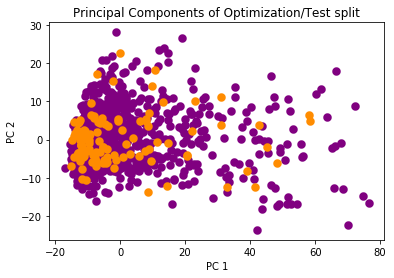

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
tot_brews_y_out_rem = tot_brews_y[tot_brews_X_out_rem.index]
shuffle_tot_X, shuffle_tot_y = shuffle(tot_brews_X_out_rem, tot_brews_y_out_rem)
X_tot_opt, X_tot_test, y_tot_opt, y_tot_test = train_test_split(shuffle_tot_X, shuffle_tot_y, test_size=0.1)

x_opt = StandardScaler().fit_transform(X_tot_opt)
x_ho = StandardScaler().fit_transform(X_tot_test)

principalComponents_opt = pca.transform(x_opt)
principalComponents_ho = pca.transform(x_ho)

principalDf_opt = pd.DataFrame(data = principalComponents_opt
             , columns = ['principal component 1', 'principal component 2'])
principalDf_ho = pd.DataFrame(data = principalComponents_ho
             , columns = ['principal component 1', 'principal component 2'])


opt_x = principalDf_opt['principal component 1']
opt_y = principalDf_opt['principal component 2']

ho_x = principalDf_ho['principal component 1']
ho_y = principalDf_ho['principal component 2']

plt.scatter(opt_x, opt_y, edgecolors='purple', s=20, linewidths=4)
plt.scatter(ho_x, ho_y, edgecolors='darkorange', s=20, linewidths=4)
plt.title('Principal Components of Optimization/Test split')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.show()

In [14]:
X_tot_opt.to_csv('X_optimization.csv')
X_tot_test.to_csv('X_test.csv')

# Model Sub-part Optimizations

In [51]:
X_tot_opt = pd.read_csv('X_optimization.csv').set_index('GEOID')
X_tot_test = pd.read_csv('X_test.csv').set_index('GEOID')

In [52]:
tot_brews_y.head()

GEOID
15003    1
45013    0
33015    1
26081    1
25017    1
Name: 18, dtype: int64

In [15]:
y_tot_opt = tot_brews_y[X_tot_opt.index]
y_tot_test = tot_brews_y[X_tot_test.index]

In [16]:
list_of_binaries = []
for i in range(18):
    list_of_binaries.append(str(i))
    
trunc_brews = tot_brews_X[list_of_binaries].join(pd.get_dummies(demog_1['Stab']), on='GEOID', how='left')
feature_columns_1 = trunc_brews.columns

In [17]:
from sklearn.metrics import precision_recall_curve

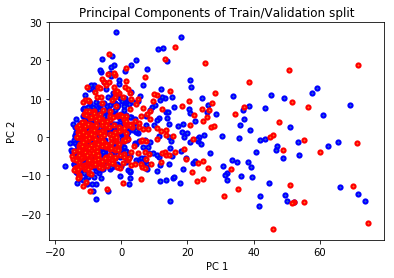

In [52]:
X_tot_train, X_tot_valid, y_tot_train, y_tot_valid = train_test_split(X_tot_opt, y_tot_opt, test_size=0.4)

x_opt = StandardScaler().fit_transform(X_tot_train)
x_ho = StandardScaler().fit_transform(X_tot_valid)

principalComponents_opt = pca.transform(x_opt)
principalComponents_ho = pca.transform(x_ho)

principalDf_opt = pd.DataFrame(data = principalComponents_opt
             , columns = ['principal component 1', 'principal component 2'])
principalDf_ho = pd.DataFrame(data = principalComponents_ho
             , columns = ['principal component 1', 'principal component 2'])


opt_x = principalDf_opt['principal component 1']
opt_y = principalDf_opt['principal component 2']

ho_x = principalDf_ho['principal component 1']
ho_y = principalDf_ho['principal component 2']

plt.scatter(opt_x, opt_y, marker='.', edgecolors='blue', s=20, linewidths=4)
plt.scatter(ho_x, ho_y, marker='.', edgecolors='red', s=20, linewidths=4)
plt.title('Principal Components of Train/Validation split')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.show()

In [53]:
X_tot_train_1 = X_tot_train[feature_columns_1]
X_tot_train_2 = X_tot_train.drop(feature_columns_1, axis=1)

X_tot_valid_1 = X_tot_valid[feature_columns_1]
X_tot_valid_2 = X_tot_valid.drop(feature_columns_1, axis=1)

In [54]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc
import numpy as np

## Rafo on Binary Features

In [ ]:
# train_curves = []
# train_aucs = []

# validation_aucs = []
# roc_curves = []

# probs_train = []
# probs_valid = []

# for i in range(3):
#     Rafo_1_pipe=Pipeline([('SS', StandardScaler()),('RF',RandomForestClassifier())])
#     params={'RF__n_estimators':[200], 'RF__n_jobs':[8], 'RF__max_depth':[6], 
#         'RF__max_features':[36], 'RF__class_weight':['balanced']}
#     Rafo_1_gscv=GridSearchCV(Rafo_1_pipe,param_grid=params,cv=5)
#     Rafo_1_gscv.fit(X_tot_train_1, y_tot_train)
# #     Rafo_1_gscv.best_score_
    
#     conf_scores_train = Rafo_1_gscv.predict_proba(X_tot_train_1)
#     true_openings_train = y_tot_train.values
#     roc_curve_train_result = roc_curve(true_openings_train, conf_scores_train[:,1])
#     roc_auc_train = auc(roc_curve_train_result[0], roc_curve_train_result[1])
#     train_aucs.append(roc_auc_train)
#     train_curves.append(roc_curve_train_result)
#     probs_train.append(conf_scores_train)
    
#     conf_scores_valid = Rafo_1_gscv.predict_proba(X_tot_valid_1)
#     true_openings_valid = y_tot_valid.values
#     roc_curve_valid_result = roc_curve(true_openings_valid, conf_scores_valid[:,1])
#     roc_auc_valid = auc(roc_curve_valid_result[0], roc_curve_valid_result[1])
#     validation_aucs.append(roc_auc_valid)
#     roc_curves.append(roc_curve_valid_result)
#     probs_valid.append(conf_scores_valid)

# precision_train1, recall_train1, _ = precision_recall_curve(y_tot_train, np.mean(probs_train, axis=0)[:,1])
# precision_valid1, recall_valid1, _ = precision_recall_curve(y_tot_valid, np.mean(probs_valid, axis=0)[:,1])

# fig=plt.figure(figsize=(6, 8), dpi= 80, facecolor='w', edgecolor='k')

# plt.subplot(2, 1, 1)
# plt.step(recall_train1, precision_train1, color='black', alpha=0.5,
#          where='post')
# plt.fill_between(recall_train1, precision_train1, alpha=0.5, color='grey')
# plt.step(recall_valid1, precision_valid1, color='red', alpha = 0.5,
#          where='post')
# plt.fill_between(recall_valid1, precision_valid1, alpha=0.3, color='red')
# plt.xlabel('Recall')
# plt.ylabel('Precision')
# plt.ylim([0.0, 1.05])
# plt.xlim([0.0, 1.0])
# plt.title('Precision Recall - Binaries Only')

# plt.subplot(2, 1, 2)
# for curve in train_curves:
#     plt.plot(curve[0], curve[1], color = 'gray')
# for curve in roc_curves:
#     plt.plot(curve[0], curve[1], color = 'red')
# plt.plot([0,1],[0,1], color='navy', linestyle='--')
# plt.title('ROC Curve - RF Model on train and Validation - mean AUC = {}'.format(np.mean(validation_aucs).round(4)))
# plt.ylabel('True Positive Rate')
# plt.xlabel('False Positive Rate')

# plt.subplots_adjust(hspace = 0.3)
# plt.show()

## Rafo on Demographics

In [179]:
y_tot_train[:y_tot_train.shape[0]//(0+1)]

GEOID
6045     1
20169    0
28161    0
53069    0
24019    0
42091    1
13135    1
37171    1
12073    1
47149    0
25005    1
18105    0
53057    0
25015    1
29157    0
49035    1
24031    1
37189    0
30059    0
47141    1
51013    1
56021    1
4023     1
19181    1
39165    1
12069    0
28035    0
24047    0
56037    0
6077     1
        ..
18091    0
28151    1
28075    1
30039    0
5007     1
55069    0
42033    0
51019    1
36097    0
38017    1
37049    0
27037    0
29095    1
36011    0
41005    0
8101     0
22071    1
6107     0
50011    0
15009    0
20091    1
55053    0
18161    0
53015    0
24025    0
5119     0
6093     1
45051    1
55111    0
39089    1
Name: 18, Length: 598, dtype: int64

In [188]:
X_tot_train_2

train_curves = []
train_aucs = []

validation_aucs = []
roc_curves = []

probs_train = []
probs_valid = []

for i in range(10):
    Rafo_2_pipe=Pipeline([('SS', StandardScaler()),('RF',RandomForestClassifier())])
    params={'RF__n_estimators':[30], 'RF__n_jobs':[8], 'RF__max_depth':[6], 
        'RF__max_features':[36], 'RF__class_weight':['balanced']}
    Rafo_2_gscv=GridSearchCV(Rafo_2_pipe,param_grid=params,cv=5)
    Rafo_2_gscv.fit(X_tot_train_2[:X_tot_train_2.shape[0]//(i+1)], y_tot_train[:y_tot_train.shape[0]//(i+1)])
#     Rafo_1_gscv.best_score_
    
    conf_scores_train = Rafo_2_gscv.predict_proba(X_tot_train_2)
    true_openings_train = y_tot_train.values
    roc_curve_train_result = roc_curve(true_openings_train, conf_scores_train[:,1])
    roc_auc_train = auc(roc_curve_train_result[0], roc_curve_train_result[1])
    train_aucs.append(roc_auc_train)
    train_curves.append(roc_curve_train_result)
    probs_train.append(conf_scores_train)
    
    conf_scores_valid = Rafo_2_gscv.predict_proba(X_tot_valid_2)
    true_openings_valid = y_tot_valid.values
    roc_curve_valid_result = roc_curve(true_openings_valid, conf_scores_valid[:,1])
    roc_auc_valid = auc(roc_curve_valid_result[0], roc_curve_valid_result[1])
    validation_aucs.append(roc_auc_valid)
#     roc_curves.append(roc_curve_valid_result)
#     probs_valid.append(conf_scores_valid)

# precision_train1, recall_train1, _ = precision_recall_curve(y_tot_train, np.mean(probs_train, axis=0)[:,1])
# precision_valid1, recall_valid1, _ = precision_recall_curve(y_tot_valid, np.mean(probs_valid, axis=0)[:,1])
range_of_train_size = [x*X_tot_train_2.shape[0]//10 for x in range(10)]



/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/home/jovyan/conda-envs/test_env/lib/pyt

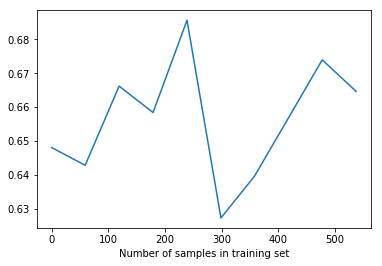

In [192]:
plt.plot(range_of_train_size, validation_aucs[::-1])
plt.xlabel('Number of samples in training set')
plt.show()

## hyperopt

In [56]:
import hyperopt.pyll.stochastic
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
from sklearn.model_selection import cross_val_score

In [59]:
def hyperopt_train_test(params):
    X = StandardScaler().fit_transform(X_tot_train_1)
    clf = RandomForestClassifier(**params)
    return cross_val_score(clf, X, y_tot_train, cv=5).mean()

space4rf = {
    'max_depth': hp.choice('max_depth', range(1,20)),
    'max_features': hp.choice('max_features', range(1,69)),
    'n_estimators': hp.choice('n_estimators', range(1,200)),
    'criterion': hp.choice('criterion', ["gini", "entropy"])
}

best = 0

def f(params):
    global best
    acc = hyperopt_train_test(params)
    if acc > best:
        best = acc
        print('new best:', best, params)
    return {'loss': -acc, 'status': STATUS_OK}

trials = Trials()
best = fmin(f, space4rf, algo=tpe.suggest, max_evals=100, trials=trials)
print('best:')
print(best)

new best:                                            
0.6522031622566382                                   
{'criterion': 'entropy', 'max_depth': 2, 'max_features': 24, 'n_estimators': 114}
new best:                                                                      
0.6539949533532421                                                             
{'criterion': 'entropy', 'max_depth': 7, 'max_features': 52, 'n_estimators': 76}
new best:                                                                      
0.6589951848507999                                                             
{'criterion': 'gini', 'max_depth': 6, 'max_features': 7, 'n_estimators': 140}  
new best:                                                                       
0.665606523601176                                                               
{'criterion': 'entropy', 'max_depth': 2, 'max_features': 29, 'n_estimators': 98}
new best:                                                                       
0.665

In [ ]:
{'criterion': 'gini', 'max_depth': 3, 'max_features': 65, 'n_estimators': 112}   

In [60]:
from sklearn.model_selection import cross_validate

In [70]:
def hyperopt_train_test(params):
    X = StandardScaler().fit_transform(X_tot_train_2)
    clf = RandomForestClassifier(**params, n_jobs=8)
    return cross_val_score(clf, X, y_tot_train, cv=5).mean()

space4rf = {
    'max_depth': hp.choice('max_depth', range(2,8)),
    'max_features': hp.choice('max_features', range(30,50)),
    'n_estimators': hp.choice('n_estimators', range(30,400,10)),
    'criterion': hp.choice('criterion', ["gini", "entropy"])
}

best = 0

def f(params):
    global best
    acc = hyperopt_train_test(params)
    if acc > best:
        best = acc
        print('new best:', best, params)
    return {'loss': -acc, 'status': STATUS_OK}

trials = Trials()
best = fmin(f, space4rf, algo=tpe.suggest, max_evals=100, trials=trials)
print('best:')
print(best)

new best:                                            
0.6873161330647962                                   
{'criterion': 'gini', 'max_depth': 4, 'max_features': 41, 'n_estimators': 90}
new best:                                                                      
0.6906496978956872                                                             
{'criterion': 'entropy', 'max_depth': 6, 'max_features': 45, 'n_estimators': 290}
new best:                                                                      
0.6923163645623539                                                             
{'criterion': 'gini', 'max_depth': 4, 'max_features': 46, 'n_estimators': 240} 
new best:                                                                       
0.69901127393106                                                                
{'criterion': 'gini', 'max_depth': 6, 'max_features': 36, 'n_estimators': 250}  
new best:                                                                       
0.704011

KeyboardInterrupt: 

In [67]:
X = StandardScaler().fit_transform(X_tot_train_2)
X_v = StandardScaler().fit_transform(X_tot_valid_2)
def hyperopt_train_test(params):    
    aucs_ = []
    for i in range(5):
        clf = GridSearchCV(RandomForestClassifier(**params, n_jobs=8), param_grid={},cv=3)
        clf.fit(X, y_tot_train)
        conf_scores_train = clf.predict_proba(X_v)
        true_openings_train = y_tot_valid.values
        roc_curve_train_result = roc_curve(true_openings_train, conf_scores_train[:,1])
        roc_auc_train = auc(roc_curve_train_result[0], roc_curve_train_result[1])
        aucs_.append(roc_auc_train)
    print(clf.score(X, y_tot_train), clf.score(X_v, y_tot_valid), params)
    return np.mean(aucs_)

space4rf = {
    'max_depth': hp.choice('max_depth', range(2,20,2)),
    'max_features': hp.choice('max_features', range(1,100,10)),
    'n_estimators': hp.choice('n_estimators', range(50,400,50)),
    'criterion': hp.choice('criterion', ["gini", "entropy"])
}

best = 0

def f(params):
    global best
    acc = hyperopt_train_test(params)    
    if acc > best:
        best = acc
        print('-------------------new best-------------------', best, params)
    return {'loss': -acc, 'status': STATUS_OK}

trials = Trials()
best = fmin(f, space4rf, algo=tpe.suggest, max_evals=300, trials=trials)
print('best:')
print(best)

1.0                                                  
0.69                                                 
{'criterion': 'entropy', 'max_depth': 16, 'max_features': 91, 'n_estimators': 150}
-------------------new best-------------------       
0.6577329184286815                                   
{'criterion': 'entropy', 'max_depth': 16, 'max_features': 91, 'n_estimators': 150}
0.717391304347826                                                                
0.6875                                                                           
{'criterion': 'entropy', 'max_depth': 2, 'max_features': 91, 'n_estimators': 350}
-------------------new best-------------------                                   
0.6680922364956514                                                               
{'criterion': 'entropy', 'max_depth': 2, 'max_features': 91, 'n_estimators': 350}
1.0                                                                              
0.6925                                      

KeyboardInterrupt: 

In [105]:
best

{'criterion': 1, 'max_depth': 11, 'max_features': 34, 'n_estimators': 98}

# final rafo models

In [230]:
#{'criterion': 'gini', 'max_depth': 3, 'max_features': 65, 'n_estimators': 112}   

train_curves = []
train_aucs = []

validation_aucs = []
roc_curves = []

probs_train = []
probs_valid = []

for i in range(10):
    Rafo_1_pipe=Pipeline([('SS', StandardScaler()),('RF',RandomForestClassifier())])
    params={'RF__n_estimators':[112], 'RF__n_jobs':[8], 'RF__max_depth':[3], 
        'RF__max_features':[65], 'RF__criterion':['gini']}
    Rafo_1_gscv=GridSearchCV(Rafo_1_pipe,param_grid=params,cv=5)
    Rafo_1_gscv.fit(X_tot_train_1, y_tot_train)
#     Rafo_1_gscv.best_score_
    
    conf_scores_train = Rafo_1_gscv.predict_proba(X_tot_train_1)
    true_openings_train = y_tot_train.values
    roc_curve_train_result = roc_curve(true_openings_train, conf_scores_train[:,1])
    roc_auc_train = auc(roc_curve_train_result[0], roc_curve_train_result[1])
    train_aucs.append(roc_auc_train)
    train_curves.append(roc_curve_train_result)
    probs_train.append(conf_scores_train)
    
    conf_scores_valid = Rafo_1_gscv.predict_proba(X_tot_valid_1)
    true_openings_valid = y_tot_valid.values
    roc_curve_valid_result = roc_curve(true_openings_valid, conf_scores_valid[:,1])
    roc_auc_valid = auc(roc_curve_valid_result[0], roc_curve_valid_result[1])
    validation_aucs.append(roc_auc_valid)
    roc_curves.append(roc_curve_valid_result)
    probs_valid.append(conf_scores_valid)

precision_train1, recall_train1, _ = precision_recall_curve(y_tot_train, np.mean(probs_train, axis=0)[:,1])
precision_valid1, recall_valid1, _ = precision_recall_curve(y_tot_valid, np.mean(probs_valid, axis=0)[:,1])

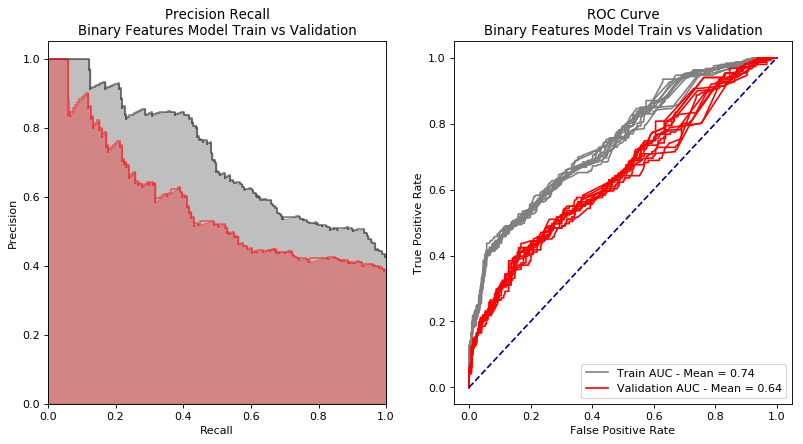

In [231]:
fig=plt.figure(figsize=(12, 6), dpi= 80, facecolor='w', edgecolor='k')
plt.subplot(1, 2, 1)
plt.step(recall_train1, precision_train1, color='black', alpha=0.5,
         where='post')
plt.fill_between(recall_train1, precision_train1, alpha=0.5, color='grey')
plt.step(recall_valid1, precision_valid1, color='red', alpha = 0.5,
         where='post')
plt.fill_between(recall_valid1, precision_valid1, alpha=0.3, color='red')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision Recall\nBinary Features Model Train vs Validation')

plt.subplot(1, 2, 2)
for curve in train_curves:
    plt.plot(curve[0], curve[1], color = 'gray')
plt.plot(train_curves[-1][0], train_curves[-1][1], color = 'gray', label='Train AUC - Mean = {}'.format(np.mean(train_aucs).round(2)))
for curve in roc_curves:
    plt.plot(curve[0], curve[1], color = 'red')
plt.plot(roc_curves[-1][0], roc_curves[-1][1], color = 'red', label='Validation AUC - Mean = {}'.format(np.mean(validation_aucs).round(2)))
plt.plot([0,1],[0,1], color='navy', linestyle='--')
plt.title('ROC Curve\nBinary Features Model Train vs Validation')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.subplots_adjust(hspace = 0.2)
plt.show()

In [ ]:
# X_tot_train_2.shape

In [226]:
# {'criterion': 'gini', 'max_depth': 2, 'max_features': 1, 'n_estimators': 250}

train_curves = []
train_aucs = []

validation_aucs = []
roc_curves = []

probs_train = []
probs_valid = []

for i in range(10):
    Rafo_2_pipe=Pipeline([('SS', StandardScaler()),('RF',RandomForestClassifier())])
    params={'RF__n_estimators':[30], 'RF__n_jobs':[8], 'RF__max_depth':[3], 
        'RF__max_features':[200], 'RF__criterion':['gini']}
    Rafo_2_gscv=GridSearchCV(Rafo_2_pipe,param_grid=params,cv=2)
    Rafo_2_gscv.fit(X_tot_train_2, y_tot_train)
#     Rafo_1_gscv.best_score_
    
    conf_scores_train = Rafo_2_gscv.predict_proba(X_tot_train_2)
    true_openings_train = y_tot_train.values
    roc_curve_train_result = roc_curve(true_openings_train, conf_scores_train[:,1])
    roc_auc_train = auc(roc_curve_train_result[0], roc_curve_train_result[1])
    train_aucs.append(roc_auc_train)
    train_curves.append(roc_curve_train_result)
    probs_train.append(conf_scores_train)
    
    conf_scores_valid = Rafo_2_gscv.predict_proba(X_tot_valid_2)
    true_openings_valid = y_tot_valid.values
    roc_curve_valid_result = roc_curve(true_openings_valid, conf_scores_valid[:,1])
    roc_auc_valid = auc(roc_curve_valid_result[0], roc_curve_valid_result[1])
    validation_aucs.append(roc_auc_valid)
    roc_curves.append(roc_curve_valid_result)
    probs_valid.append(conf_scores_valid)

precision_train1, recall_train1, _ = precision_recall_curve(y_tot_train, np.mean(probs_train, axis=0)[:,1])
precision_valid1, recall_valid1, _ = precision_recall_curve(y_tot_valid, np.mean(probs_valid, axis=0)[:,1])

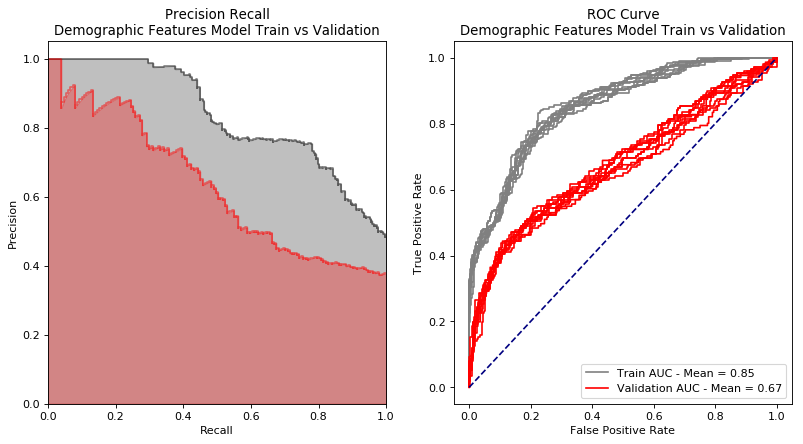

In [229]:
fig=plt.figure(figsize=(12, 6), dpi= 80, facecolor='w', edgecolor='k')
plt.subplot(1, 2, 1)
plt.step(recall_train1, precision_train1, color='black', alpha=0.5,
         where='post')
plt.fill_between(recall_train1, precision_train1, alpha=0.5, color='grey')
plt.step(recall_valid1, precision_valid1, color='red', alpha = 0.5,
         where='post')
plt.fill_between(recall_valid1, precision_valid1, alpha=0.3, color='red')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision Recall\nDemographic Features Model Train vs Validation')

plt.subplot(1, 2, 2)
for curve in train_curves:
    plt.plot(curve[0], curve[1], color = 'gray')
plt.plot(train_curves[-1][0], train_curves[-1][1], color = 'gray', label='Train AUC - Mean = {}'.format(np.mean(train_aucs).round(2)))
for curve in roc_curves:
    plt.plot(curve[0], curve[1], color = 'red')
plt.plot(roc_curves[-1][0], roc_curves[-1][1], color = 'red', label='Validation AUC - Mean = {}'.format(np.mean(validation_aucs).round(2)))
plt.plot([0,1],[0,1], color='navy', linestyle='--')
plt.title('ROC Curve\nDemographic Features Model Train vs Validation')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.subplots_adjust(hspace = 0.2)
plt.show()

# LR for final prediction

In [232]:
from sklearn.linear_model import LogisticRegression

predict1_train = Rafo_1_gscv.predict_proba(X_tot_train_1)
predict1_valid = Rafo_1_gscv.predict_proba(X_tot_valid_1)

predict2_train = Rafo_2_gscv.predict_proba(X_tot_train_2)
predict2_valid = Rafo_2_gscv.predict_proba(X_tot_valid_2)

In [233]:
fin_pred_df_train = pd.DataFrame(X_tot_train_1.index).join(pd.DataFrame(predict1_train), how='right').join(pd.DataFrame(predict2_train), lsuffix='_1', rsuffix='_2').set_index('GEOID')
fin_pred_df_valid = pd.DataFrame(X_tot_train_1.index).join(pd.DataFrame(predict1_valid), how='right').join(pd.DataFrame(predict2_valid), lsuffix='_1', rsuffix='_2').set_index('GEOID')

In [234]:
def hyperopt_train_test(params):
    X = fin_pred_df_train
    clf = LogisticRegression(**params)
    return cross_val_score(clf, X, y_tot_train, cv=5).mean()

space4rf = {
    'C': hp.choice('C', [0.001*x for x in range(1, 1001, 2)]),
    'penalty': hp.choice('penalty', ['l1','l2','elasticnet','none']),
    'class_weight': hp.choice('class_weight', ['balanced',None]),
    'solver': hp.choice('solver', ["saga"]),
    'l1_ratio': hp.choice('l1_ratio', [0.001*x for x in range(0, 1000, 2)])
}

best = 0

def f(params):
    global best
    acc = hyperopt_train_test(params)
    if acc > best:
        best = acc
        print('new best:', best, params)
    return {'loss': -acc, 'status': STATUS_OK}

trials = Trials()
best = fmin(f, space4rf, algo=tpe.suggest, max_evals=300, trials=trials)
print('best:')
print(best)

new best:                                            
0.75918142463597                                     
{'C': 0.167, 'class_weight': 'balanced', 'l1_ratio': 0.844, 'penalty': 'l1', 'solver': 'saga'}
new best:                                            
0.775946130518323                                                            
{'C': 0.179, 'class_weight': 'balanced', 'l1_ratio': 0.382, 'penalty': 'none', 'solver': 'saga'}
  1%|          | 2/300 [00:00<00:23, 12.43it/s, best loss: -0.775946130518323]

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/lin

new best:                                                                     
0.7775987915827487                                                            
{'C': 0.9390000000000001, 'class_weight': 'balanced', 'l1_ratio': 0.432, 'penalty': 'l2', 'solver': 'saga'}
  2%|▏         | 6/300 [00:00<00:34,  8.45it/s, best loss: -0.7775987915827487]

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/lin

  3%|▎         | 8/300 [00:00<00:30,  9.55it/s, best loss: -0.7775987915827487]

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/lin

new best:                                                                       
0.7776127971849898                                                              
{'C': 0.7030000000000001, 'class_weight': 'balanced', 'l1_ratio': 0.378, 'penalty': 'l2', 'solver': 'saga'}
  4%|▍         | 12/300 [00:01<00:28, 10.11it/s, best loss: -0.7776127971849898]

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/lin

  5%|▍         | 14/300 [00:01<00:29,  9.58it/s, best loss: -0.7776127971849898]

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/lin

  6%|▌         | 18/300 [00:01<00:27, 10.21it/s, best loss: -0.7776127971849898]

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/lin

  7%|▋         | 20/300 [00:02<00:29,  9.51it/s, best loss: -0.7776127971849898]

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1510: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1510: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "

/home/jovyan/conda-envs/test_env/lib/python3.7/site-pack

  8%|▊         | 24/300 [00:02<00:27,  9.99it/s, best loss: -0.7776127971849898]

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/lin

  9%|▊         | 26/300 [00:02<00:29,  9.38it/s, best loss: -0.7776127971849898]

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/lin

 10%|█         | 30/300 [00:03<00:27,  9.95it/s, best loss: -0.7776127971849898]

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/lin

 11%|█         | 32/300 [00:03<00:28,  9.39it/s, best loss: -0.7776127971849898]

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1510: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1510: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "

/home/jovyan/conda-envs/test_env/lib/python3.7/site-pack

 11%|█▏        | 34/300 [00:03<00:26, 10.22it/s, best loss: -0.7776127971849898]

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/lin

 12%|█▏        | 36/300 [00:03<00:27,  9.54it/s, best loss: -0.7776127971849898]

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/lin

 13%|█▎        | 40/300 [00:04<00:25, 10.05it/s, best loss: -0.7776127971849898]

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/lin

 14%|█▍        | 42/300 [00:04<00:27,  9.51it/s, best loss: -0.7776127971849898]

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/lin

 15%|█▌        | 46/300 [00:04<00:25, 10.02it/s, best loss: -0.7776127971849898]

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/lin

 16%|█▌        | 48/300 [00:04<00:26,  9.53it/s, best loss: -0.7776127971849898]

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/lin

 17%|█▋        | 52/300 [00:05<00:24, 10.04it/s, best loss: -0.7776127971849898]

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/lin

 18%|█▊        | 54/300 [00:05<00:26,  9.45it/s, best loss: -0.7776127971849898]

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/lin

 19%|█▉        | 58/300 [00:06<00:24,  9.99it/s, best loss: -0.7776127971849898]

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/lin

 20%|██        | 60/300 [00:06<00:25,  9.30it/s, best loss: -0.7776127971849898]

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1510: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1510: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "

/home/jovyan/conda-envs/test_env/lib/python3.7/site-pack

 21%|██▏       | 64/300 [00:06<00:23,  9.88it/s, best loss: -0.7776127971849898]

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/lin

 23%|██▎       | 68/300 [00:07<00:22, 10.14it/s, best loss: -0.7776127971849898]

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/lin

 23%|██▎       | 70/300 [00:07<00:24,  9.48it/s, best loss: -0.7776127971849898]

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/lin

 25%|██▍       | 74/300 [00:07<00:22,  9.97it/s, best loss: -0.7776127971849898]

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/lin

 25%|██▌       | 76/300 [00:07<00:23,  9.39it/s, best loss: -0.7776127971849898]

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/lin

 27%|██▋       | 80/300 [00:08<00:22,  9.88it/s, best loss: -0.7776127971849898]

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/lin

 27%|██▋       | 82/300 [00:08<00:23,  9.35it/s, best loss: -0.7776127971849898]

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/lin

 29%|██▊       | 86/300 [00:08<00:21,  9.91it/s, best loss: -0.7776127971849898]

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/lin

 29%|██▉       | 88/300 [00:09<00:23,  9.06it/s, best loss: -0.7776127971849898]

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1510: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1510: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "

/home/jovyan/conda-envs/test_env/lib/python3.7/site-pack

 30%|███       | 90/300 [00:09<00:21,  9.98it/s, best loss: -0.7776127971849898]

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/lin

 31%|███       | 92/300 [00:09<00:22,  9.36it/s, best loss: -0.7776127971849898]

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/lin

 32%|███▏      | 96/300 [00:10<00:20,  9.73it/s, best loss: -0.7776127971849898]

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1510: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1510: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "

/home/jovyan/conda-envs/test_env/lib/python3.7/site-pack

 33%|███▎      | 98/300 [00:10<00:21,  9.21it/s, best loss: -0.7776127971849898]

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/lin

 34%|███▍      | 102/300 [00:10<00:20,  9.82it/s, best loss: -0.7776127971849898]

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1510: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1510: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "

/home/jovyan/conda-envs/test_env/lib/python3.7/site-pack

 35%|███▍      | 104/300 [00:10<00:21,  9.30it/s, best loss: -0.7776127971849898]

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/lin

 36%|███▌      | 108/300 [00:11<00:19,  9.87it/s, best loss: -0.7776127971849898]

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/lin

 37%|███▋      | 110/300 [00:11<00:20,  9.32it/s, best loss: -0.7776127971849898]

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/lin

 38%|███▊      | 114/300 [00:11<00:18,  9.86it/s, best loss: -0.7776127971849898]

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/lin

 39%|███▉      | 118/300 [00:12<00:18, 10.10it/s, best loss: -0.7776127971849898]

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1510: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1510: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "

/home/jovyan/conda-envs/test_env/lib/python3.7/site-pack

 40%|████      | 120/300 [00:12<00:19,  9.47it/s, best loss: -0.7776127971849898]

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/lin

 41%|████▏     | 124/300 [00:13<00:17,  9.97it/s, best loss: -0.7776127971849898]

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1510: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1510: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "

/home/jovyan/conda-envs/test_env/lib/python3.7/site-pack

 42%|████▏     | 126/300 [00:13<00:18,  9.39it/s, best loss: -0.7776127971849898]

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/lin

 43%|████▎     | 130/300 [00:13<00:17,  9.92it/s, best loss: -0.7776127971849898]

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/lin

new best:                                                                        
0.7792934694538973                                                               
{'C': 0.605, 'class_weight': 'balanced', 'l1_ratio': 0.644, 'penalty': 'l2', 'solver': 'saga'}
 44%|████▍     | 132/300 [00:13<00:18,  9.15it/s, best loss: -0.7792934694538973]

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/lin

 45%|████▌     | 136/300 [00:14<00:16,  9.73it/s, best loss: -0.7792934694538973]

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/lin

 46%|████▌     | 138/300 [00:14<00:17,  9.16it/s, best loss: -0.7792934694538973]

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/lin

 47%|████▋     | 142/300 [00:14<00:16,  9.80it/s, best loss: -0.7792934694538973]

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/lin

 48%|████▊     | 144/300 [00:15<00:16,  9.26it/s, best loss: -0.7792934694538973]

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1510: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1510: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "

/home/jovyan/conda-envs/test_env/lib/python3.7/site-pack

 49%|████▉     | 148/300 [00:15<00:15,  9.86it/s, best loss: -0.7792934694538973]

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/lin

 50%|█████     | 150/300 [00:15<00:16,  9.32it/s, best loss: -0.7792934694538973]

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/lin

 51%|█████     | 152/300 [00:15<00:14, 10.15it/s, best loss: -0.7792934694538973]

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/lin

 51%|█████▏    | 154/300 [00:16<00:15,  9.46it/s, best loss: -0.7792934694538973]

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/lin

 53%|█████▎    | 158/300 [00:16<00:14,  9.93it/s, best loss: -0.7792934694538973]

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/lin

 53%|█████▎    | 160/300 [00:16<00:15,  9.33it/s, best loss: -0.7792934694538973]

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/lin

 55%|█████▍    | 164/300 [00:17<00:13,  9.84it/s, best loss: -0.7792934694538973]

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/lin

 55%|█████▌    | 166/300 [00:17<00:14,  9.24it/s, best loss: -0.7792934694538973]

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/lin

 57%|█████▋    | 170/300 [00:17<00:13,  9.74it/s, best loss: -0.7792934694538973]

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/lin

 57%|█████▋    | 172/300 [00:18<00:14,  9.06it/s, best loss: -0.7792934694538973]

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/lin

 59%|█████▊    | 176/300 [00:18<00:12,  9.66it/s, best loss: -0.7792934694538973]

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/lin

 59%|█████▉    | 178/300 [00:18<00:13,  9.17it/s, best loss: -0.7792934694538973]

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/lin

 60%|██████    | 180/300 [00:18<00:11, 10.03it/s, best loss: -0.7792934694538973]

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1510: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1510: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "

/home/jovyan/conda-envs/test_env/lib/python3.7/site-pack

 61%|██████    | 182/300 [00:19<00:12,  9.38it/s, best loss: -0.7792934694538973]

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/lin

 62%|██████▏   | 186/300 [00:19<00:11,  9.87it/s, best loss: -0.7792934694538973]

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/lin

 63%|██████▎   | 188/300 [00:19<00:12,  9.31it/s, best loss: -0.7792934694538973]

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1510: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1510: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "

/home/jovyan/conda-envs/test_env/lib/python3.7/site-pack

 64%|██████▍   | 192/300 [00:20<00:10,  9.85it/s, best loss: -0.7792934694538973]

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/lin

 65%|██████▍   | 194/300 [00:20<00:11,  9.27it/s, best loss: -0.7792934694538973]

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/lin

 66%|██████▌   | 198/300 [00:20<00:10,  9.80it/s, best loss: -0.7792934694538973]

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1510: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1510: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "

/home/jovyan/conda-envs/test_env/lib/python3.7/site-pack

 67%|██████▋   | 200/300 [00:21<00:10,  9.25it/s, best loss: -0.7792934694538973]

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/lin

 67%|██████▋   | 202/300 [00:21<00:09, 10.10it/s, best loss: -0.7792934694538973]

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/lin

 68%|██████▊   | 204/300 [00:21<00:10,  9.51it/s, best loss: -0.7792934694538973]

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/lin

 69%|██████▉   | 208/300 [00:21<00:09,  9.96it/s, best loss: -0.7792934694538973]

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/lin

 70%|███████   | 210/300 [00:22<00:09,  9.33it/s, best loss: -0.7792934694538973]

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/lin

 71%|███████▏  | 214/300 [00:22<00:08,  9.82it/s, best loss: -0.7792934694538973]

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1510: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1510: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "

/home/jovyan/conda-envs/test_env/lib/python3.7/site-pack

 72%|███████▏  | 216/300 [00:22<00:09,  9.29it/s, best loss: -0.7792934694538973]

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/lin

 73%|███████▎  | 220/300 [00:23<00:08,  9.85it/s, best loss: -0.7792934694538973]

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/lin

 74%|███████▍  | 222/300 [00:23<00:08,  9.32it/s, best loss: -0.7792934694538973]

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1510: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1510: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "

/home/jovyan/conda-envs/test_env/lib/python3.7/site-pack

 75%|███████▌  | 226/300 [00:23<00:07,  9.85it/s, best loss: -0.7792934694538973]

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/lin

 76%|███████▌  | 228/300 [00:24<00:07,  9.31it/s, best loss: -0.7792934694538973]

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/lin

 77%|███████▋  | 230/300 [00:24<00:06, 10.10it/s, best loss: -0.7792934694538973]

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/lin

 77%|███████▋  | 232/300 [00:24<00:07,  9.44it/s, best loss: -0.7792934694538973]

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/lin

 79%|███████▊  | 236/300 [00:24<00:06,  9.94it/s, best loss: -0.7792934694538973]

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/lin

 80%|████████  | 240/300 [00:25<00:06,  9.09it/s, best loss: -0.7792934694538973]

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1510: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1510: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "

/home/jovyan/conda-envs/test_env/lib/python3.7/site-pack

 81%|████████  | 242/300 [00:25<00:05,  9.96it/s, best loss: -0.7792934694538973]

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/lin

 81%|████████▏ | 244/300 [00:25<00:05,  9.35it/s, best loss: -0.7792934694538973]

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/lin

 83%|████████▎ | 248/300 [00:26<00:05,  9.85it/s, best loss: -0.7792934694538973]

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1510: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1510: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "

/home/jovyan/conda-envs/test_env/lib/python3.7/site-pack

 83%|████████▎ | 250/300 [00:26<00:05,  9.38it/s, best loss: -0.7792934694538973]

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/lin

 85%|████████▍ | 254/300 [00:26<00:04,  9.91it/s, best loss: -0.7792934694538973]

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/lin

 85%|████████▌ | 256/300 [00:27<00:04,  9.34it/s, best loss: -0.7792934694538973]

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/lin

 87%|████████▋ | 260/300 [00:27<00:04,  9.88it/s, best loss: -0.7792934694538973]

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/lin

 87%|████████▋ | 262/300 [00:27<00:04,  9.31it/s, best loss: -0.7792934694538973]

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/lin

 88%|████████▊ | 264/300 [00:27<00:03, 10.13it/s, best loss: -0.7792934694538973]

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/lin

 89%|████████▊ | 266/300 [00:28<00:03,  9.48it/s, best loss: -0.7792934694538973]

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/lin

 90%|█████████ | 270/300 [00:28<00:03,  9.96it/s, best loss: -0.7792934694538973]

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/lin

 91%|█████████ | 272/300 [00:28<00:02,  9.37it/s, best loss: -0.7792934694538973]

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/lin

 92%|█████████▏| 276/300 [00:29<00:02,  9.91it/s, best loss: -0.7792934694538973]

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/lin

 93%|█████████▎| 278/300 [00:29<00:02,  9.34it/s, best loss: -0.7792934694538973]

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/lin

 94%|█████████▍| 282/300 [00:29<00:01,  9.83it/s, best loss: -0.7792934694538973]

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1510: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1510: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "

/home/jovyan/conda-envs/test_env/lib/python3.7/site-pack

 95%|█████████▍| 284/300 [00:30<00:01,  9.32it/s, best loss: -0.7792934694538973]

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/lin

 96%|█████████▌| 288/300 [00:30<00:01,  9.76it/s, best loss: -0.7792934694538973]

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/lin

 97%|█████████▋| 290/300 [00:30<00:01,  9.20it/s, best loss: -0.7792934694538973]

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1510: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1510: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "

/home/jovyan/conda-envs/test_env/lib/python3.7/site-pack

 98%|█████████▊| 294/300 [00:31<00:00,  9.76it/s, best loss: -0.7792934694538973]

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/lin

 99%|█████████▊| 296/300 [00:31<00:00,  9.29it/s, best loss: -0.7792934694538973]

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/lin

 99%|█████████▉| 298/300 [00:31<00:00, 10.11it/s, best loss: -0.7792934694538973]

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/lin

100%|██████████| 300/300 [00:31<00:00,  9.39it/s, best loss: -0.7792934694538973]
best:
{'C': 302, 'class_weight': 0, 'l1_ratio': 322, 'penalty': 1, 'solver': 0}


/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/lin

In [235]:
best

{'C': 302, 'class_weight': 0, 'l1_ratio': 322, 'penalty': 1, 'solver': 0}

In [236]:
print('C = ',[0.001*x for x in range(1, 1001, 2)][302])
print('l1_ratio = ', [0.001*x for x in range(0, 1000, 2)][322])
print('penalty =', ['l1','l2','elasticnet','none'][1])

C =  0.605
l1_ratio =  0.644
penalty = l2


In [ ]:
# {'C': 0.737, 'class_weight': 'balanced', 'l1_ratio': 0.9560000000000001, 'penalty': 'l1', 'solver': 'saga'}

In [237]:
LR_fin_pipe=Pipeline([('SS', StandardScaler()),('LR',LogisticRegression())])

params={'LR__C':[0.605], 'LR__class_weight':['balanced'],
       'LR__l1_ratio':[0.644], 'LR__penalty':['l2'],
       'LR__solver':['saga']}
LR_fin_gscv=GridSearchCV(LR_fin_pipe,param_grid=params,cv=5)
LR_fin_gscv.fit(fin_pred_df_train, y_tot_train)
LR_fin_gscv.cv_results_

/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
/home/jovyan/conda-envs/test_env/lib/python3.7/site-packages/sklearn/linear_

{'mean_fit_time': array([0.00405889]),
 'std_fit_time': array([0.0002835]),
 'mean_score_time': array([0.00094337]),
 'std_score_time': array([6.72572684e-05]),
 'param_LR__C': masked_array(data=[0.605],
              mask=[False],
        fill_value='?',
             dtype=object),
 'param_LR__class_weight': masked_array(data=['balanced'],
              mask=[False],
        fill_value='?',
             dtype=object),
 'param_LR__l1_ratio': masked_array(data=[0.644],
              mask=[False],
        fill_value='?',
             dtype=object),
 'param_LR__penalty': masked_array(data=['l2'],
              mask=[False],
        fill_value='?',
             dtype=object),
 'param_LR__solver': masked_array(data=['saga'],
              mask=[False],
        fill_value='?',
             dtype=object),
 'params': [{'LR__C': 0.605,
   'LR__class_weight': 'balanced',
   'LR__l1_ratio': 0.644,
   'LR__penalty': 'l2',
   'LR__solver': 'saga'}],
 'split0_test_score': array([0.7768595]),
 'split

In [238]:
LR_fin_gscv.best_score_

0.7775919732441472

In [44]:
fin_pred_df_valid

,0_1,1_1,0_2,1_2
GEOID,,,,
12111,0.743252,0.256748,0.733565,0.266435
8101,0.609812,0.390188,0.782936,0.217064
8105,0.624691,0.375309,0.740301,0.259699
55131,0.744660,0.255340,0.663713,0.336287
19061,0.631807,0.368193,0.709751,0.290249
55123,0.635470,0.364530,0.557752,0.442248
4015,0.666012,0.333988,0.692811,0.307189
53015,0.592686,0.407314,0.693998,0.306002
35045,0.210779,0.789221,0.179205,0.820795


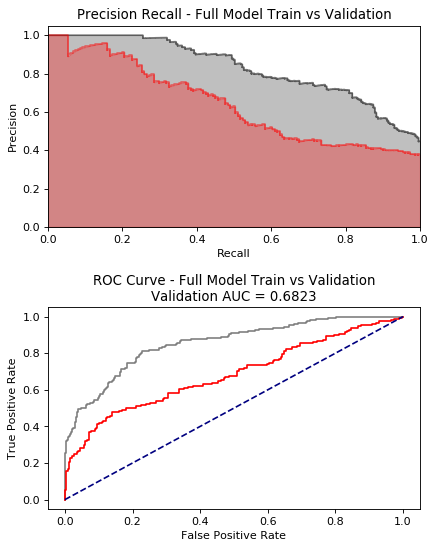

In [239]:
train_curves = []
train_aucs = []

validation_aucs = []
roc_curves = []

probs_train = []
probs_valid = []

for i in range(1):
    conf_scores_train = LR_fin_gscv.predict_proba(fin_pred_df_train)
    true_openings_train = y_tot_train.values
    roc_curve_train_result = roc_curve(true_openings_train, conf_scores_train[:,1])
    roc_auc_train = auc(roc_curve_train_result[0], roc_curve_train_result[1])
    train_aucs.append(roc_auc_train)
    train_curves.append(roc_curve_train_result)
    probs_train.append(conf_scores_train)
    
    conf_scores_valid = LR_fin_gscv.predict_proba(fin_pred_df_valid)
    true_openings_valid = y_tot_valid.values
    roc_curve_valid_result = roc_curve(true_openings_valid, conf_scores_valid[:,1])
    roc_auc_valid = auc(roc_curve_valid_result[0], roc_curve_valid_result[1])
    validation_aucs.append(roc_auc_valid)
    roc_curves.append(roc_curve_valid_result)
    probs_valid.append(conf_scores_valid)

precision_train1, recall_train1, _ = precision_recall_curve(y_tot_train, np.mean(probs_train, axis=0)[:,1])
precision_valid1, recall_valid1, _ = precision_recall_curve(y_tot_valid, np.mean(probs_valid, axis=0)[:,1])

fig=plt.figure(figsize=(6, 8), dpi= 80, facecolor='w', edgecolor='k')

plt.subplot(2, 1, 1)
plt.step(recall_train1, precision_train1, color='black', alpha=0.5,
         where='post')
plt.fill_between(recall_train1, precision_train1, alpha=0.5, color='grey')
plt.step(recall_valid1, precision_valid1, color='red', alpha = 0.5,
         where='post')
plt.fill_between(recall_valid1, precision_valid1, alpha=0.3, color='red')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision Recall - Full Model Train vs Validation')

plt.subplot(2, 1, 2)
for curve in train_curves:
    plt.plot(curve[0], curve[1], color = 'gray')
for curve in roc_curves:
    plt.plot(curve[0], curve[1], color = 'red')
plt.plot([0,1],[0,1], color='navy', linestyle='--')
plt.title('ROC Curve - Full Model Train vs Validation\nValidation AUC = {}'.format(np.mean(validation_aucs).round(4)))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

plt.subplots_adjust(hspace = 0.4)
plt.show()

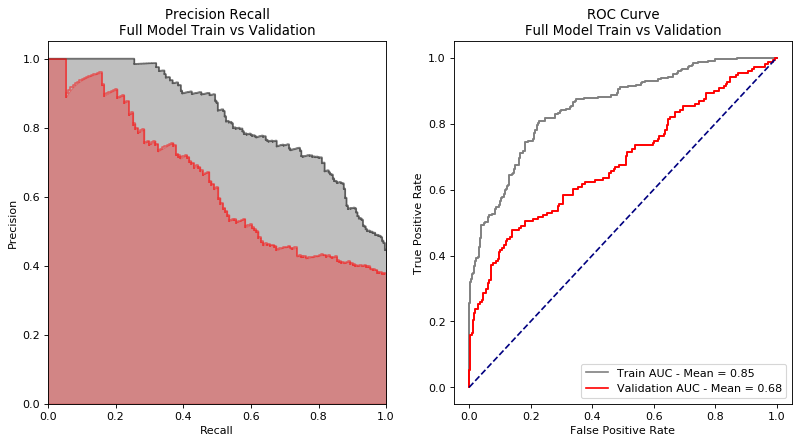

In [241]:
fig=plt.figure(figsize=(12, 6), dpi= 80, facecolor='w', edgecolor='k')
plt.subplot(1, 2, 1)
plt.step(recall_train1, precision_train1, color='black', alpha=0.5,
         where='post')
plt.fill_between(recall_train1, precision_train1, alpha=0.5, color='grey')
plt.step(recall_valid1, precision_valid1, color='red', alpha = 0.5,
         where='post')
plt.fill_between(recall_valid1, precision_valid1, alpha=0.3, color='red')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision Recall\nFull Model Train vs Validation')

plt.subplot(1, 2, 2)
for curve in train_curves:
    plt.plot(curve[0], curve[1], color = 'gray')
plt.plot(train_curves[-1][0], train_curves[-1][1], color = 'gray', label='Train AUC - Mean = {}'.format(np.mean(train_aucs).round(2)))
for curve in roc_curves:
    plt.plot(curve[0], curve[1], color = 'red')
plt.plot(roc_curves[-1][0], roc_curves[-1][1], color = 'red', label='Validation AUC - Mean = {}'.format(np.mean(validation_aucs).round(2)))
plt.plot([0,1],[0,1], color='navy', linestyle='--')
plt.title('ROC Curve\nFull Model Train vs Validation')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.subplots_adjust(hspace = 0.2)
plt.show()

# Test Set Validation

In [270]:
import dill
Rafo_1_gscv = dill.load(open('RandomForest1.pkd', 'rb'))
Rafo_2_gscv = dill.load(open('RandomForest2.pkd', 'rb'))
LR_fin_gscv = dill.load(open('LogisticFinal.pkd', 'rb'))

In [271]:
y_tot_test.values

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1])

In [272]:
X_demog_test = X_tot_test.drop(feature_columns_1, axis=1)
X_categ_test = X_tot_test[feature_columns_1]

In [274]:
X_demog_opt = X_tot_opt.drop(feature_columns_1, axis=1)
X_categ_opt = X_tot_opt[feature_columns_1]

In [275]:
final_model = Rafo_2_gscv

In [276]:
final_model.score(X_demog_test, y_tot_test)

0.7027027027027027

In [277]:
conf_scores_train

array([[0.22190992, 0.77809008],
       [0.73186042, 0.26813958],
       [0.81076077, 0.18923923],
       ...,
       [0.08653942, 0.91346058],
       [0.70344736, 0.29655264],
       [0.38565185, 0.61434815]])

In [278]:
conf_scores_train = Rafo_2_gscv.predict_proba(X_demog_opt)
true_openings_train = y_tot_opt.values
roc_curve_train_result = roc_curve(true_openings_train, conf_scores_train[:,1])
roc_auc_train = auc(roc_curve_train_result[0], roc_curve_train_result[1])

conf_scores_test = Rafo_2_gscv.predict_proba(X_demog_test)
true_openings_test = y_tot_test.values
roc_curve_test_result = roc_curve(true_openings_test, conf_scores_test[:,1])
roc_auc_test = auc(roc_curve_test_result[0], roc_curve_test_result[1])

precision_opt, recall_opt, _ = precision_recall_curve(y_tot_opt.values, conf_scores_train[:,1])
precision_test, recall_test, _ = precision_recall_curve(y_tot_test.values, conf_scores_test[:,1])

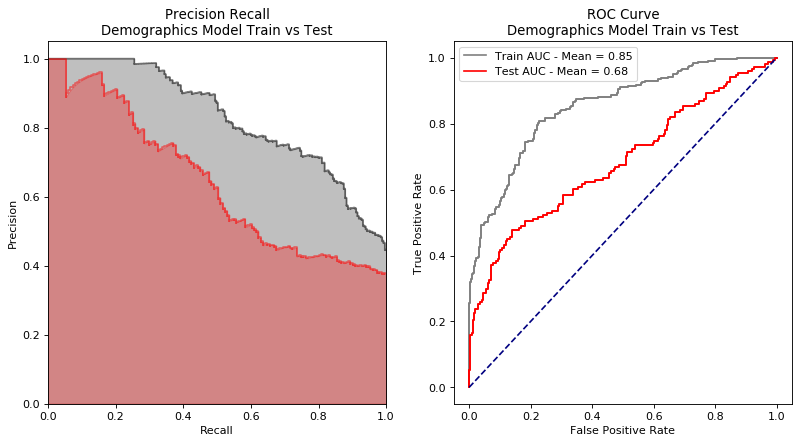

In [279]:
fig=plt.figure(figsize=(12, 6), dpi= 80, facecolor='w', edgecolor='k')
plt.subplot(1, 2, 1)
plt.step(recall_train1, precision_train1, color='black', alpha=0.5,
         where='post')
plt.fill_between(recall_train1, precision_train1, alpha=0.5, color='grey')
plt.step(recall_valid1, precision_valid1, color='red', alpha = 0.5,
         where='post')
plt.fill_between(recall_valid1, precision_valid1, alpha=0.3, color='red')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision Recall\nDemographics Model Train vs Validation')

plt.subplot(1, 2, 2)
for curve in train_curves:
    plt.plot(curve[0], curve[1], color = 'gray')
plt.plot(train_curves[-1][0], train_curves[-1][1], color = 'gray', label='Train AUC - Mean = {}'.format(np.mean(train_aucs).round(2)))
for curve in roc_curves:
    plt.plot(curve[0], curve[1], color = 'red')
plt.plot(roc_curves[-1][0], roc_curves[-1][1], color = 'red', label='Test AUC - Mean = {}'.format(np.mean(validation_aucs).round(2)))
plt.plot([0,1],[0,1], color='navy', linestyle='--')
plt.title('ROC Curve\nDemographics Model Train vs Validation')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.subplots_adjust(hspace = 0.2)
plt.show()

In [296]:
feature_imps = Rafo_2_gscv.best_estimator_.named_steps['RF'].feature_importances_

In [297]:
sorted_feature_imps = feature_imps.argsort()[::-1]

In [298]:
dict_of_importances={}
n_zeros=0

for i in sorted_feature_imps:
        curr_feature = X_demog_opt.columns[i]         
        if feature_imps[i] > 0:
                dict_of_importances[curr_feature] = feature_imps[i]
        else:
            n_zeros+=1


In [299]:
n_zeros

450

In [300]:
sorted_list=[]

for key in dict_of_importances.keys():
    sorted_list.append((dict_of_importances[key], key))

sorted_list = sorted(sorted_list)[::-1]

In [304]:
for i in sorted_list[:10]:
    print(i)

(0.06991757258945011, 'NonFamHHpop')
(0.06605604399152429, 'PovUniverseUnrelated')
(0.029674612278757465, 'Units5_9')
(0.029149205600464665, 'Divorced')
(0.027088092745364376, 'NonHispPop')
(0.020852973067798524, 'Hval300')
(0.019746891199126076, 'WalkToWork')
(0.019597925128959148, 'NeverMarried')
(0.019176850091821553, 'InCollege')
(0.018510825122854437, 'PersonsPerRoomMedium')


In [286]:
predict1_train = Rafo_1_gscv.predict_proba(X_tot_train_1)
predict1_valid = Rafo_1_gscv.predict_proba(X_tot_valid_1)

predict2_train = Rafo_2_gscv.predict_proba(X_tot_train_2)
predict2_valid = Rafo_2_gscv.predict_proba(X_tot_valid_2)

fin_pred_df_train = pd.DataFrame(X_tot_train_1.index).join(pd.DataFrame(predict1_train), how='right').join(pd.DataFrame(predict2_train), lsuffix='_1', rsuffix='_2').set_index('GEOID')
fin_pred_df_valid = pd.DataFrame(X_tot_train_1.index).join(pd.DataFrame(predict1_valid), how='right').join(pd.DataFrame(predict2_valid), lsuffix='_1', rsuffix='_2').set_index('GEOID')

In [287]:
fin_pred_df_train.isnull()

,0_1,1_1,0_2,1_2
GEOID,,,,
6045,False,False,False,False
20169,False,False,False,False
28161,False,False,False,False
53069,False,False,False,False
24019,False,False,False,False
42091,False,False,False,False
13135,False,False,False,False
37171,False,False,False,False
12073,False,False,False,False


In [294]:
train_curves = []
train_aucs = []

validation_aucs = []
roc_curves = []

probs_train = []
probs_valid = []

for i in range(1):
    conf_scores_train = LR_fin_gscv.predict_proba(fin_pred_df_train)
    true_openings_train = y_tot_train.values
    roc_curve_train_result = roc_curve(true_openings_train, conf_scores_train[:,1])
    roc_auc_train = auc(roc_curve_train_result[0], roc_curve_train_result[1])
    train_aucs.append(roc_auc_train)
    train_curves.append(roc_curve_train_result)
    probs_train.append(conf_scores_train)
    
    conf_scores_valid = LR_fin_gscv.predict_proba(fin_pred_df_valid)
    true_openings_valid = y_tot_valid.values
    roc_curve_valid_result = roc_curve(true_openings_valid, conf_scores_valid[:,1])
    roc_auc_valid = auc(roc_curve_valid_result[0], roc_curve_valid_result[1])
    validation_aucs.append(roc_auc_valid)
    roc_curves.append(roc_curve_valid_result)
    probs_valid.append(conf_scores_valid)

precision_train1, recall_train1, _ = precision_recall_curve(y_tot_train, np.mean(probs_train, axis=0)[:,1])
precision_valid1, recall_valid1, _ = precision_recall_curve(y_tot_valid, np.mean(probs_valid, axis=0)[:,1])

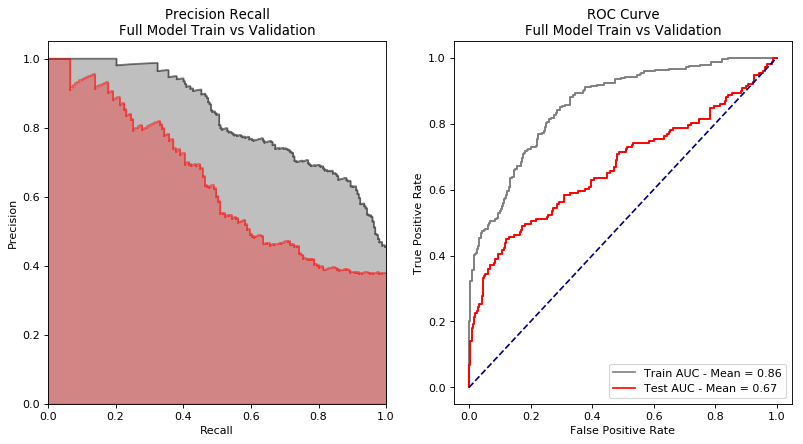

In [295]:
fig=plt.figure(figsize=(12, 6), dpi= 80, facecolor='w', edgecolor='k')
plt.subplot(1, 2, 1)
plt.step(recall_train1, precision_train1, color='black', alpha=0.5,
         where='post')
plt.fill_between(recall_train1, precision_train1, alpha=0.5, color='grey')
plt.step(recall_valid1, precision_valid1, color='red', alpha = 0.5,
         where='post')
plt.fill_between(recall_valid1, precision_valid1, alpha=0.3, color='red')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision Recall\nFull Model Train vs Validation')

plt.subplot(1, 2, 2)
for curve in train_curves:
    plt.plot(curve[0], curve[1], color = 'gray')
plt.plot(train_curves[-1][0], train_curves[-1][1], color = 'gray', label='Train AUC - Mean = {}'.format(np.mean(train_aucs).round(2)))
for curve in roc_curves:
    plt.plot(curve[0], curve[1], color = 'red')
plt.plot(roc_curves[-1][0], roc_curves[-1][1], color = 'red', label='Test AUC - Mean = {}'.format(np.mean(validation_aucs).round(2)))
plt.plot([0,1],[0,1], color='navy', linestyle='--')
plt.title('ROC Curve\nFull Model Train vs Validation')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.subplots_adjust(hspace = 0.2)
plt.show()

In [111]:
# import dill
# dill.dump(Rafo_1_gscv, open('RandomForest1.pkd', 'wb'))
# dill.dump(Rafo_2_gscv, open('RandomForest2.pkd', 'wb'))
# dill.dump(LR_fin_gscv, open('LogisticFinal.pkd', 'wb'))

## LR test

In [290]:
X_fin_test_1 = X_tot_test[feature_columns_1]
X_fin_test_2 = X_tot_test.drop(feature_columns_1, axis=1)

X_fin_opt_1 = X_tot_opt[feature_columns_1]
X_fin_opt_2 = X_tot_opt.drop(feature_columns_1, axis=1)

predict1_test = Rafo_1_gscv.predict_proba(X_fin_test_1)
predict2_test = Rafo_2_gscv.predict_proba(X_fin_test_2)

predict1_opt = Rafo_1_gscv.predict_proba(X_fin_opt_1)
predict2_opt = Rafo_2_gscv.predict_proba(X_fin_opt_2)

In [291]:
fin_pred_df_test = pd.DataFrame(X_fin_test_1.index).join(pd.DataFrame(predict1_test), how='right').join(pd.DataFrame(predict2_test), lsuffix='_1', rsuffix='_2').set_index('GEOID')
fin_pred_df_opt = pd.DataFrame(X_tot_opt.index).join(pd.DataFrame(predict1_opt), how='right').join(pd.DataFrame(predict1_opt), lsuffix='_1', rsuffix='_2').set_index('GEOID')

In [292]:
train_curves = []
train_aucs = []

validation_aucs = []
roc_curves = []

probs_train = []
probs_valid = []

for i in range(10):
    conf_scores_train = LR_fin_gscv.predict_proba(fin_pred_df_opt)
    true_openings_train = y_tot_opt.values
    roc_curve_train_result = roc_curve(true_openings_train, conf_scores_train[:,1])
    roc_auc_train = auc(roc_curve_train_result[0], roc_curve_train_result[1])
    train_aucs.append(roc_auc_train)
    train_curves.append(roc_curve_train_result)
    probs_train.append(conf_scores_train)
    
    conf_scores_valid = LR_fin_gscv.predict_proba(fin_pred_df_test)
    true_openings_valid = y_tot_test.values
    roc_curve_valid_result = roc_curve(true_openings_valid, conf_scores_valid[:,1])
    roc_auc_valid = auc(roc_curve_valid_result[0], roc_curve_valid_result[1])
    validation_aucs.append(roc_auc_valid)
    roc_curves.append(roc_curve_valid_result)
    probs_valid.append(conf_scores_valid)

precision_train1, recall_train1, _ = precision_recall_curve(y_tot_opt, np.mean(probs_train, axis=0)[:,1])
precision_valid1, recall_valid1, _ = precision_recall_curve(y_tot_test, np.mean(probs_valid, axis=0)[:,1])

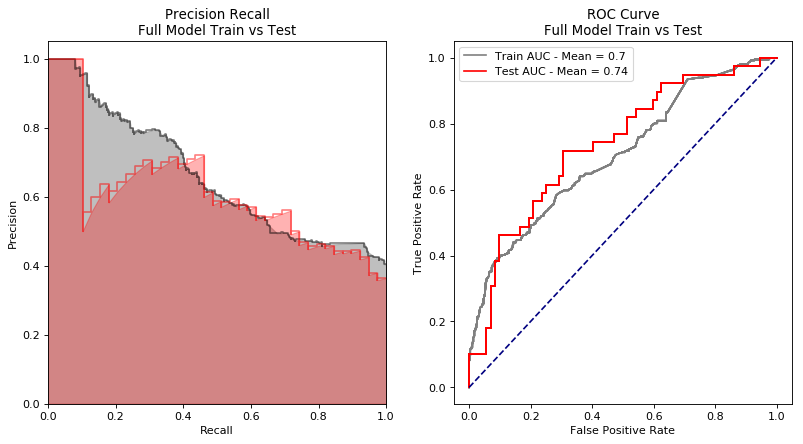

In [293]:
fig=plt.figure(figsize=(12, 6), dpi= 80, facecolor='w', edgecolor='k')
plt.subplot(1, 2, 1)
plt.step(recall_train1, precision_train1, color='black', alpha=0.5,
         where='post')
plt.fill_between(recall_train1, precision_train1, alpha=0.5, color='grey')
plt.step(recall_valid1, precision_valid1, color='red', alpha = 0.5,
         where='post')
plt.fill_between(recall_valid1, precision_valid1, alpha=0.3, color='red')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision Recall\nFull Model Train vs Test')

plt.subplot(1, 2, 2)
for curve in train_curves:
    plt.plot(curve[0], curve[1], color = 'gray')
plt.plot(train_curves[-1][0], train_curves[-1][1], color = 'gray', label='Train AUC - Mean = {}'.format(np.mean(train_aucs).round(2)))
for curve in roc_curves:
    plt.plot(curve[0], curve[1], color = 'red')
plt.plot(roc_curves[-1][0], roc_curves[-1][1], color = 'red', label='Test AUC - Mean = {}'.format(np.mean(validation_aucs).round(2)))
plt.plot([0,1],[0,1], color='navy', linestyle='--')
plt.title('ROC Curve\nFull Model Train vs Test')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.subplots_adjust(hspace = 0.2)
plt.show()

# Predictions for 2020

In [115]:
cat_feats_1 = ['0','1','2','3','4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17']
cat_feats_mut1 = ['0','1','2','3','4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16']
cat_feats_mut2 = ['1','2','3','4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17',]

In [116]:
fin_X = shuffle_tot_X

In [117]:
fin_X[cat_feats_mut1] = fin_X[cat_feats_mut2]

In [118]:
fin_X['17'] = shuffle_tot_y

In [119]:
fin_X.head()

,0,1,2,3,4,5,6,7,8,9,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
GEOID,,,,,,,,,,,,,,,,,,,,,
46081,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
1073,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
9001,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27041,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26061,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [120]:
X_1 = fin_X[feature_columns_1]
X_2 = fin_X.drop(feature_columns_1, axis=1)

pred_X1 = Rafo_1_gscv.predict_proba(X_1)
pred_X2 = Rafo_2_gscv.predict_proba(X_2)

In [121]:
fin_pred_df_total_model = pd.DataFrame(fin_X.index).join(pd.DataFrame(pred_X1), how='right').join(pd.DataFrame(pred_X2), lsuffix='_1', rsuffix='_2').set_index('GEOID')

In [122]:
fin_pred_df_total_model = LR_fin_gscv.predict_proba(fin_pred_df_total_model)

In [123]:
predictions = pd.DataFrame(X_1.index).join(pd.DataFrame(fin_pred_df_total_model)).set_index('GEOID')

In [124]:
predictions.head()

,0,1
GEOID,,
46081,0.861217,0.138783
1073,0.038881,0.961119
9001,0.012801,0.987199
27041,0.840298,0.159702
26061,0.819314,0.180686


In [125]:
predictions[predictions[1]>0.90]

,0,1
GEOID,,
1073,0.038881,0.961119
9001,0.012801,0.987199
45019,0.018451,0.981549
41029,0.025205,0.974795
36059,0.030565,0.969435
48491,0.081534,0.918466
36007,0.094269,0.905731
8041,0.006218,0.993782
16001,0.004077,0.995923


In [126]:
list_of_binaries = ['1','2','3','4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17','18']

demog_for_fin_pred = pd.merge(raw_data[list_of_binaries], demog_data, how='right', on='GEOID').drop(['County','Stab','Over5','pctOthLang','pctSpanish','pctOver5',
              'pctEnglishOnly','AvgHHSize_moe','Over5_moe'], axis=1)

In [127]:
demog_for_fin_pred = demog_for_fin_pred.join(pd.get_dummies(demog_1['Stab']), on='GEOID', how='left')

In [128]:
demog_for_fin_pred.drop(list_of_moes, axis=1, inplace=True)

In [129]:
demog_for_fin_pred.shape

(3140, 669)

In [130]:
demog_for_fin_pred.median()

1                                0.0
2                                0.0
3                                0.0
4                                0.0
5                                0.0
6                                0.0
7                                0.0
8                                0.0
9                                0.0
10                               0.0
11                               0.0
12                               0.0
13                               0.0
14                               0.0
15                               0.0
16                               0.0
17                               0.0
18                               0.0
pctFBEnteredGE2000              45.1
HHInc10                        626.0
Units2                         253.0
NativeEnteredGE2000            103.0
FamHHInc10                     222.0
pctHHInc15                      11.8
AvgCommute                      23.1
pctNonFamHHpop                  16.0
pctGrandPrntsCaring5orMore      41.2
p

In [131]:
demog_for_fin_pred.fillna(demog_for_fin_pred.median(), inplace=True)

In [148]:
openings_list=[]
for i in range(1,19):
    openings_list.append(str(i))

In [149]:
states_list=feature_columns_1[18:]

states_list

Index(['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'HI',
       'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN',
       'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH',
       'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VT', 'WA',
       'WI', 'WV', 'WY'],
      dtype='object')

In [150]:
cat_feats = list(openings_list) + list(states_list)

In [151]:
cat_feats

['1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 'AK',
 'AL',
 'AR',
 'AZ',
 'CA',
 'CO',
 'CT',
 'DC',
 'DE',
 'FL',
 'GA',
 'HI',
 'IA',
 'ID',
 'IL',
 'IN',
 'KS',
 'KY',
 'LA',
 'MA',
 'MD',
 'ME',
 'MI',
 'MN',
 'MO',
 'MS',
 'MT',
 'NC',
 'ND',
 'NE',
 'NH',
 'NJ',
 'NM',
 'NV',
 'NY',
 'OH',
 'OK',
 'OR',
 'PA',
 'RI',
 'SC',
 'SD',
 'TN',
 'TX',
 'UT',
 'VA',
 'VT',
 'WA',
 'WI',
 'WV',
 'WY']

In [153]:
X_1 = demog_for_fin_pred[cat_feats]
X_2 = demog_for_fin_pred.drop(cat_feats, axis=1)

pred_X1 = Rafo_1_gscv.predict_proba(X_1)
pred_X2 = Rafo_2_gscv.predict_proba(X_2)

fin_pred_df_total_model = pd.DataFrame(fin_X.index).join(pd.DataFrame(pred_X1), how='right').join(pd.DataFrame(pred_X2), lsuffix='_1', rsuffix='_2').set_index('GEOID')
fin_pred_df_total_model = LR_fin_gscv.predict_proba(fin_pred_df_total_model)

In [154]:
predictions = pd.DataFrame(X_1.index).join(pd.DataFrame(fin_pred_df_total_model)).set_index('GEOID')

In [158]:
predictions[predictions[1]>.90]

,0,1
GEOID,,
15003,0.069753,0.930247
33015,0.011282,0.988718
26081,0.006488,0.993512
25017,0.010057,0.989943
39061,0.006418,0.993582
24510,0.022799,0.977201
8031,0.005615,0.994385
48453,0.007678,0.992322
6073,0.005496,0.994504


# Export

In [164]:
predictions.to_csv('final_model_predictions.csv')

In [ ]:
# import dill
# dill.dump(Rafo_1_gscv, open('RandomForest1.pkd', 'wb'))
# dill.dump(Rafo_2_gscv, open('RandomForest2.pkd', 'wb'))
# dill.dump(LR_fin_gscv, open('LogisticFinal.pkd', 'wb'))

In [166]:
demog_data['TotPop'].max()

10105722